# Single Qubit Gates

In the previous section we looked at all the possible states a qubit could be in. We saw that qubits could be represented by 2D vectors, and that their states are limited to the form:

$$ |q\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Where $\theta$ and $\phi$ are real numbers. In this section we will cover _gates,_ the operations that change a qubit between these states. Due to the number of gates and the similarities between them, this chapter is at risk of becoming a list. To counter this, we have included a few digressions to introduce important ideas at appropriate places throughout the chapter. 

## Contents    

1. [The Pauli Gates](#pauli)    
    1.1 [The X-Gate](#xgate)    
    1.2 [The Y & Z-Gates](#ynzgatez)    
2. [Digression: The X, Y & Z-Bases](#xyzbases)    
3. [The Hadamard Gate](#hgate)    
4. [Digression: Measuring in Different Bases](#measuring)    
5. [The P-gate](#rzgate)    
6. [The I, S and T-gates](#istgates)    
    6.1 [The I-Gate](#igate)    
    6.2 [The S-Gate](#sgate)    
    6.3 [The T-Gate](#tgate)    
7. [The General U-gate](#generalU)    

In _The Atoms of Computation_ we came across some gates and used them to perform a classical computation. An important feature of quantum circuits is that, between initialising the qubits and measuring them, the operations (gates) are *_always_* reversible! These reversible gates can be represented as matrices, and as rotations around the Bloch sphere. 

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

## 1. The Pauli Gates <a id="pauli"></a>
You should be familiar with the Pauli matrices from the linear algebra section. If any of the maths here is new to you, you should use the linear algebra section to bring yourself up to speed. We will see here that the Pauli matrices can represent some very commonly used quantum gates.

### 1.1 The X-Gate <a id="xgate"></a>
The X-gate is represented by the Pauli-X matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = |0\rangle\langle1| + |1\rangle\langle0| $$

To see the effect a gate has on a qubit, we simply multiply the qubit’s statevector by the gate. We can see that the X-gate switches the amplitudes of the states $|0\rangle$ and $|1\rangle$:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle$$





<!--- Beware editing things inside <details> tags as it easily breaks when the notebook is converted to html --->
<details>
 <summary>Reminder: Multiplying Vectors by Matrices (Click here to expand)</summary>
  <p>Matrix multiplication is a generalisation of the inner product we saw in the last chapter. In the specific case of multiplying a vector by a matrix (as seen above), we always get a vector back:
  $$ M|v\rangle  = \begin{bmatrix}a & b \\ c & d \\\end{bmatrix}\begin{bmatrix}v_0 \\ v_1 \\\end{bmatrix}
                = \begin{bmatrix}a\cdot v_0 + b \cdot v_1 \\ c \cdot v_0 + d \cdot v_1\end{bmatrix} $$
  In quantum computing, we can write our matrices in terms of basis vectors:
  $$X = |0\rangle\langle1| + |1\rangle\langle0|$$
  This can sometimes be clearer than using a box matrix as we can see what different multiplications will result in:
  $$
      \begin{aligned}
      X|1\rangle & = (|0\rangle\langle1| + |1\rangle\langle0|)|1\rangle \\
                 & = |0\rangle\langle1|1\rangle + |1\rangle\langle0|1\rangle \\
                 & = |0\rangle \times 1 + |1\rangle \times 0 \\
                 & = |0\rangle
      \end{aligned}
  $$
  In fact, when we see a ket and a bra multiplied like this:
  $$ |a\rangle\langle b| $$
  this is called the <i>outer product</i>, which follows the rule:
  $$
      |a\rangle\langle b| = 
      \begin{bmatrix}
              a_0 b_0^* & a_0 b_1^* & \dots  & a_0 b_n^*\\ 
              a_1 b_0^* & \ddots  &        & \vdots \\
              \vdots  &         & \ddots & \vdots \\
              a_n b_0^* & \dots   & \dots  & a_n b_n^* \\
      \end{bmatrix}
  $$
  where $*$ denotes the complex conjugation. We can see this does indeed result in the X-matrix as seen above:
  $$
      |0\rangle\langle1| + |1\rangle\langle0| = 
      \begin{bmatrix}0 & 1 \\ 0 & 0 \\\end{bmatrix} +
      \begin{bmatrix}0 & 0 \\ 1 & 0 \\\end{bmatrix} = 
      \begin{bmatrix}0 & 1 \\ 1 & 0 \\\end{bmatrix} = X
  $$
</details>

In Qiskit, we can create a short circuit to verify this:

In [2]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

Let's see the result of the above circuit. **Note:** Here we use `plot_bloch_multivector()` which takes a qubit's statevector instead of the Bloch vector.

In [3]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
qrun = sim.run(qobj)
result = qrun.result()
state = result.get_statevector()
state

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


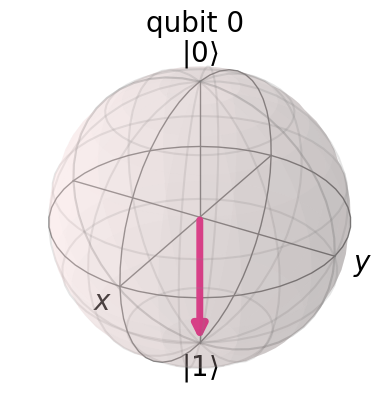

In [4]:
plot_bloch_multivector(state)

We can indeed see the state of the qubit is $|1\rangle$ as expected. We can think of this as a rotation by $\pi$ radians around the *x-axis* of the Bloch sphere. The X-gate is also often called a NOT-gate, referring to its classical analogue.

### 1.2 The Y & Z-gates  <a id="ynzgatez"></a>
Similarly to the X-gate, the Y & Z Pauli matrices also act as the Y & Z-gates in our quantum circuits:


$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \quad\quad\quad\quad Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

$$ Y = -i|0\rangle\langle1| + i|1\rangle\langle0| \quad\quad Z = |0\rangle\langle0| - |1\rangle\langle1| $$

And, unsurprisingly, they also respectively perform rotations by $\pi$ around the y and z-axis of the Bloch sphere.

Below is a widget that displays a qubit’s state on the Bloch sphere, pressing one of the buttons will perform the gate on the qubit:

In [5]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

In Qiskit, we can apply the Y and Z-gates to our circuit using:

In [6]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐ statevector ┌───┐┌───┐
q: ┤ X ├──────░──────┤ Y ├┤ Z ├
   └───┘      ░      └───┘└───┘

## 2. Digression: The X, Y & Z-Bases <a id="xyzbases"></a>

<details>
  <summary>Reminder: Eigenvectors of Matrices (Click here to expand)</summary>
We have seen that multiplying a vector by a matrix results in a vector:
     
$$
    M|v\rangle  = |v'\rangle \leftarrow \text{new vector}
    $$
If we chose the right vectors and matrices, we can find a case in which this matrix multiplication is the same as doing a multiplication by a scalar:
      
$$
    M|v\rangle  = \lambda|v\rangle
    $$
(Above, $M$ is a matrix, and $\lambda$ is a scalar). For a matrix $M$, any vector that has this property is called an <i>eigenvector</i> of $M$. For example, the eigenvectors of the Z-matrix are the states $|0\rangle$ and $|1\rangle$:

$$
      \begin{aligned}
      Z|0\rangle & = |0\rangle \\
      Z|1\rangle & = -|1\rangle
      \end{aligned}
      $$
Since we use vectors to describe the state of our qubits, we often call these vectors <i>eigenstates</i> in this context. Eigenvectors are very important in quantum computing, and it is important you have a solid grasp of them.
</details>

You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0\rangle$ and $|1\rangle$ are the two _eigenstates_ of the Z-gate. In fact, the _computational basis_ (the basis formed by the states $|0\rangle$ and $|1\rangle$) is often called the Z-basis. This is not the only basis we can use, a popular basis is the X-basis, formed by the eigenstates of the X-gate. We call these two vectors $|+\rangle$ and $|-\rangle$:

$$ |+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

$$ |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1 \end{bmatrix} $$

Another less commonly used basis is that formed by the eigenstates of the Y-gate. These are called:

$$ |\circlearrowleft\rangle, \quad |\circlearrowright\rangle$$

We leave it as an exercise to calculate these. There are in fact an infinite number of bases; to form one, we simply need two orthogonal vectors. The eigenvectors of both Hermitian and unitary matrices form a basis for the vector space. Due to this property, we can be sure that the eigenstates of the X-gate and the Y-gate indeed form a basis for 1-qubit states (read more about this in the [linear algebra page](https://qiskit.org/textbook/ch-appendix/linear_algebra.html#Matrices-and-Matrix-Operations) in the appendix)

### Quick Exercises
1. Verify that $|+\rangle$ and $|-\rangle$ are in fact eigenstates of the X-gate.
2. What eigenvalues do they have? 
3. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

Using only the Pauli-gates it is impossible to move our initialized qubit to any state other than $|0\rangle$ or $|1\rangle$, i.e. we cannot achieve superposition. This means we can see no behaviour different to that of a classical bit. To create more interesting states we will need more gates!

## 3. The Hadamard Gate  <a id="hgate"></a>

The Hadamard gate (H-gate) is a fundamental quantum gate. It allows us to move away from the poles of the Bloch sphere and create a superposition of $|0\rangle$ and $|1\rangle$. It has the matrix:

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

We can see that this performs the transformations below:

$$ H|0\rangle = |+\rangle $$

$$ H|1\rangle = |-\rangle $$

This can be thought of as a rotation around the Bloch vector `[1,0,1]` (the line between the x & z-axis), or as transforming the state of the qubit between the X and Z bases.

You can play around with these gates using the widget below:

In [7]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xe0\x00\x00\x01\xe0\x08\x06\x00\x00\x00}\xd4\xbe…

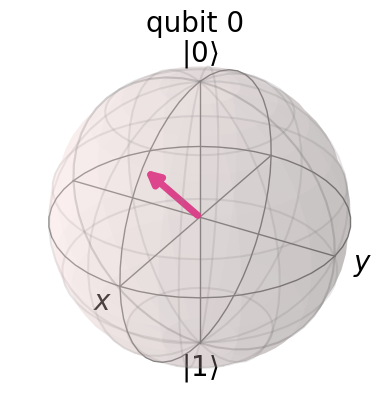

In [9]:
# The following code is modified from def def plot_bloch_multivector(state, title="", figsize=None, *, rho=None, reverse_bits=False, filename=None) .
from matplotlib import pyplot as plt
fig = plt.figure(figsize=plt.figaspect(1))
from qiskit.visualization.bloch import Bloch
B = Bloch(axes=fig.add_subplot(1, 1, 1, projection="3d"))
B.add_vectors([1 / sqrt(2), 0, 1 / sqrt(2)])
B.render(title="qubit 0")
from qiskit.visualization.utils import matplotlib_close_if_inline
fig.suptitle("", fontsize=16, y=1.01)
matplotlib_close_if_inline(fig)
fig

### Quick Exercise
1. Write the H-gate as the outer products of vectors $|0\rangle$, $|1\rangle$, $|+\rangle$ and $|-\rangle$.
2. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate.
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).

## 4. Digression: Measuring in Different Bases  <a id="measuring"></a>
We have seen that the Z-basis is not intrinsically special, and that there are infinitely many other bases. Similarly with measurement, we don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.

As an example, let’s try measuring in the X-basis. We can calculate the probability of measuring either $|+\rangle$ or $|-\rangle$:

$$ p(|+\rangle) = |\langle+|q\rangle|^2, \quad p(|-\rangle) = |\langle-|q\rangle|^2 $$

And after measurement, the superposition is destroyed. Since Qiskit only allows measuring in the Z-basis, we must create our own using Hadamard gates:

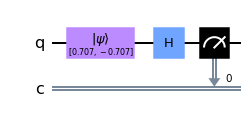

In [7]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

In the quick exercises above, we saw you could create an X-gate by sandwiching our Z-gate between two H-gates:

$$ X = HZH $$

Starting in the Z-basis, the H-gate switches our qubit to the X-basis, the Z-gate performs a NOT in the X-basis, and the final H-gate returns our qubit to the Z-basis. We can verify this always behaves like an X-gate by multiplying the matrices:

$$
HZH =
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=X
$$

Following the same logic, we have created an X-measurement by transforming from the X-basis to the Z-basis before our measurement. Since the process of measuring can have different effects depending on the system (e.g. some systems always return the qubit to $|0\rangle$ after measurement, whereas others may leave it as the measured state), the state of the qubit post-measurement is undefined and we must reset it if we want to use it again.

There is another way to see why the Hadamard gate indeed takes us from the Z-basis to the X-basis. Suppose the qubit we want to measure in the X-basis is in the (normalized) state $a |0\rangle + b |1\rangle$. To measure it in X-basis, we first express the state as a linear combination of $|+\rangle$ and $|-\rangle$. Using the relations $|0\rangle = \frac{|+\rangle + |-\rangle}{\sqrt{2}}$ and $|1\rangle = \frac{|+\rangle - |-\rangle}{\sqrt{2}}$, the state becomes $\frac{a + b}{\sqrt{2}}|+\rangle + \frac{a - b}{\sqrt{2}}|-\rangle$. Observe that the probability amplitudes in X-basis can be obtained by applying a Hadamard matrix on the state vector expressed in Z-basis.

Let’s now see the results:

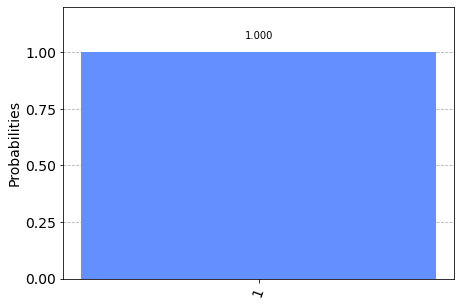

In [8]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

We initialized our qubit in the state $|-\rangle$, but we can see that, after the measurement, we have collapsed our qubit to the state $|1\rangle$. If you run the cell again, you will see the same result, since along the X-basis, the state $|-\rangle$ is a basis state and measuring it along X will always yield the same result.


### Quick Exercises
1.	If we initialize our qubit in the state $|+\rangle$, what is the probability of measuring it in state $|-\rangle$?
2.	Use Qiskit to display the probability of measuring a $|0\rangle$ qubit in the states $|+\rangle$ and $|-\rangle$ (**Hint:** you might want to use `.get_counts()` and `plot_histogram()`).
3.	Try to create a function that measures in the Y-basis.

Measuring in different bases allows us to see Heisenberg’s famous uncertainty principle in action. Having certainty of measuring a state in the Z-basis removes all certainty of measuring a specific state in the  X-basis, and vice versa. A common misconception is that the uncertainty is due to the limits in our equipment, but here we can see the uncertainty is actually part of the nature of the qubit. 

For example, if we put our qubit in the state $|0\rangle$, our measurement in the Z-basis is certain to be $|0\rangle$, but our measurement in the X-basis is completely random! Similarly, if we put our qubit in the state $|-\rangle$, our measurement in the X-basis is certain to be $|-\rangle$, but now any measurement in the Z-basis will be completely random.

More generally: _Whatever state our quantum system is in, there is always a measurement that has a deterministic outcome._ 

The introduction of the H-gate has allowed us to explore some interesting phenomena, but we are still very limited in our quantum operations. Let us now introduce a new type of gate:

## 5. The P-gate  <a id="rzgate"></a>

The P-gate (phase gate) is _parametrised,_ that is, it needs a number ($\phi$) to tell it exactly what to do. The P-gate performs a rotation of $\phi$ around the Z-axis direction. It has the matrix form:

$$
P(\phi) = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix}
$$

Where $\phi$ is a real number.

You can use the widget below to play around with the P-gate, specify $\phi$ using the slider:

In [9]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In Qiskit, we specify a P-gate using `p(phi, qubit)`:

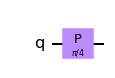

In [10]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

You may notice that the Z-gate is a special case of the P-gate, with $\phi = \pi$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the P-gate:

## 6. The I, S and T-gates  <a id="istgates"></a>

### 6.1 The I-gate  <a id="igate"></a>

First comes the I-gate (aka ‘Id-gate’ or ‘Identity gate’). This is simply a gate that does nothing. Its matrix is the identity matrix:

$$
I = \begin{bmatrix} 1 & 0 \\ 0 & 1\end{bmatrix}
$$

Applying the identity gate anywhere in your circuit should have no effect on the qubit state, so it’s interesting this is even considered a gate. There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.

#### Quick Exercise
1. What are the eigenstates of the I-gate?

### 6.2 The S-gates  <a id="sgate"></a>

The next gate to mention is the S-gate (sometimes known as the $\sqrt{Z}$-gate), this is a P-gate with $\phi = \pi/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, the S-gate is **not** its own inverse! As a result, you will often see the S<sup>†</sup>-gate, (also “S-dagger”, “Sdg” or $\sqrt{Z}^\dagger$-gate).  The S<sup>†</sup>-gate is clearly an P-gate with $\phi = -\pi/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{2}} \end{bmatrix}, \quad  S^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{2}} \end{bmatrix}$$

The name "$\sqrt{Z}$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q\rangle = Z|q\rangle $$

This notation is common throughout quantum computing.

To add an S-gate in Qiskit:

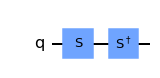

In [11]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

### 6.3 The T-gate <a id="tgate"></a>
The T-gate is a very commonly used gate, it is an P-gate with $\phi = \pi/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}, \quad  T^\dagger = \begin{bmatrix} 1 & 0 \\ 0 & e^{-\frac{i\pi}{4}} \end{bmatrix}$$

As with the S-gate, the T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In Qiskit:

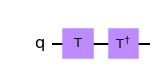

In [12]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

You can use the widget below to play around with all the gates introduced in this chapter so far:

In [13]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

## 7. The U-gate  <a id="generalU"></a>

As we saw earlier, the I, Z, S & T-gates were all special cases of the more general P-gate. In the same way, the U-gate is the most general of all single-qubit quantum gates. It is a parametrised gate of the form:

$$
U(\theta, \phi, \lambda) = \begin{bmatrix} \cos(\frac{\theta}{2}) & -e^{i\lambda}\sin(\frac{\theta}{2}) \\
            e^{i\phi}\sin(\frac{\theta}{2}) & e^{i(\phi+\lambda)}\cos(\frac{\theta}{2})
     \end{bmatrix}
$$

Every gate in this chapter could be specified as $U(\theta,\phi,\lambda)$, but it is unusual to see this in a circuit diagram, possibly due to the difficulty in reading this.

As an example, we see some specific cases of the U-gate in which it is equivalent to the H-gate and P-gate respectively.

$$
\begin{aligned}
U(\tfrac{\pi}{2}, 0, \pi) = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\
            1 & -1
     \end{bmatrix} = H
& \quad &
U(0, 0, \lambda) = \begin{bmatrix} 1 & 0 \\
            0 & e^{i\lambda}\\
     \end{bmatrix} = P
\end{aligned}
$$

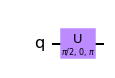

In [14]:
# Let's have U-gate transform a |0> to |+> state
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()

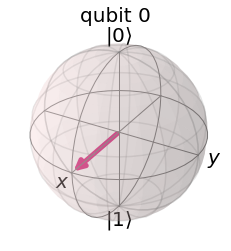

In [15]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

It should be obvious from this that there are an infinite number of possible gates, and that this also includes R<sub>x</sub> and R<sub>y</sub>-gates, although they are not mentioned here. It must also be noted that there is nothing special about the Z-basis, except that it has been selected as the standard computational basis. Qiskit also provides the X equivalent of the S and Sdg-gate i.e. the SX-gate and SXdg-gate respectively. These gates do a quarter-turn with respect to the X-axis around the Bloch sphere and are a special case of the R<sub>x</sub>-gate.


Before running on real IBM quantum hardware, all single-qubit operations are compiled down to $I$ , $X$, $SX$ and $R_{z}$ . For this reason they are sometimes called the _physical gates_.

## 8. Additional resources

You can find a community-created cheat-sheet with some of the common quantum gates, and their properties [here](https://raw.githubusercontent.com/qiskit-community/qiskit-textbook/main/content/ch-states/supplements/single-gates-cheatsheet.pdf).

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table